# One-dimensional problem

## **Open-top box problem**

An open-top box with a square bottom and rectangular sides is to have a volume of 256 cubic inches. Find the dimenslons that require the minimum amount of material.

\begin{aligned}
\begin{array}{ c }
S=x^{2} +4xy\\
V=x^{2} y=256
\end{array}\rightarrow S=x^{2} +4x\left(\frac{256}{x^{2}}\right)\\
S=x^{2} +\frac{1024}{x}\\
S^{\prime } =2x-\frac{1024}{x^{2}}\\
0=2x-\frac{1024}{x^{2}}\\
x\mathrm{=} 8\ \ \rightarrow y\mathrm{=} 4
\end{aligned}

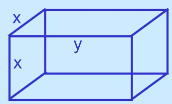

In [13]:
import numpy as np
from scipy.optimize import minimize


f = lambda x: (x[0]**2 + 4*x[0]*x[1])
ic = [1., 1.]

volume = 256.0

bounds = ((0, None), (0, None))
cons = ({'type': 'eq', 'fun': lambda x: x[0]**2 * x[1] - volume},
        {'type': 'ineq', 'fun': lambda x: x[0]},
        {'type': 'ineq', 'fun': lambda x: x[1]})

res = minimize(f, ic,  constraints=cons, method='SLSQP', tol=1e-12)

print('x =', res.x[0], ', y =', res.x[1])

x = 8.00000005248189 , y = 3.9999999475181105


---
## **Maximum area of rectangle with fixed perimeter**

The perimeter length of a rectangle is 100.
Find the dimesion of the rectangle that contributes to a maximum area.

\begin{aligned}
\begin{array}{ l }
S=xy\\
V=2x+2y=100
\end{array}\rightarrow S=x\left(\frac{100-2x}{2}\right)\\
S=50x-x^{2}\\
S^{\prime } =50-2x\\
0=50-2x\\
x\mathrm{=} 25\ \ \rightarrow \mathrm{y=} 25
\end{aligned}

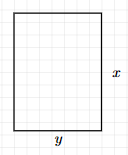

In [ ]:
import numpy as np
from scipy.optimize import minimize


f = lambda x: (x[0] + x[1])
ic = [1., 1.] # Follow the costraints!

perimeter = 100.0

bounds = ((0, None), (0, None))
cons = ({'type': 'eq', 'fun': lambda x: 2*x[0] + 2*x[1] - perimeter},
        {'type': 'ineq', 'fun': lambda x: x[0]},
        {'type': 'ineq', 'fun': lambda x: x[1]})

res = minimize(f, ic,  constraints=cons, method='SLSQP', tol=1e-12)

print('x =', res.x[0], ', y =', res.x[1])

x = 24.999999999999993 , y = 24.99999999999999


---

# **Inverse kinematic problem of a 2-link (RR) manipulator**

The forward kinematic equations of a 2-DOF (RR) manipulator:

\begin{equation}
\begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}l_1\cos\theta_1+l_2\cos(\theta_1+\theta_2)\\l_1\sin\theta_1+l_2\sin(\theta_1+\theta_2)\end{bmatrix}=\begin{bmatrix}h_1(\theta_1,\theta_2)\\h_2(\theta_1,\theta_2)\end{bmatrix}
\end{equation}


And the Jacobian is given by:

\begin{equation}
J=\begin{bmatrix}\dfrac{\partial h_1}{\partial\theta_1}&\dfrac{\partial h_1}{\partial\theta_2}\\\dfrac{\partial h_2}{\partial\theta_1}&\dfrac{\partial h_2}{\partial\theta_2}\end{bmatrix}=\begin{bmatrix}-l_1\sin\theta_1-l_2\sin(\theta_1+\theta_2)&-l_2\sin(\theta_1+\theta_2)\\l_1\cos\theta_1+l_2\cos(\theta_1+\theta_2)&l_2\cos(\theta_1+\theta_2)\end{bmatrix}
\end{equation}

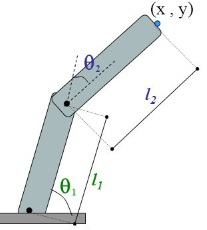

### **Some helper funcions and test data**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams.update({'font.size': 5})

from matplotlib import rc
rc('animation', html='jshtml')


def show_animation(th1, th2):
    fig = plt.figure(figsize=(4, 2))
    ax = fig.add_subplot(autoscale_on=False, xlim=(-(L1+L2), L1+L2), ylim=(-(L1+L2), L1+L2))

    h1, = ax.plot([0, 0], [0, 0], '-or')
    h2, = ax.plot([0, 0], [0, 0], '-ob')
    h3, = ax.plot([-(L1+L2), L1+L2], [0.6, 0.6], '--k')

    ax.set_aspect('equal')
    ax.grid()
    ax.axis('equal')

    def animate(k):
        x1 = [L1*np.cos(th1[k]), L1*np.sin(th1[k])]
        x2 = [L1*np.cos(th1[k]) + L2*np.cos(th1[k] + th2[k]), L1*np.sin(th1[k]) + L2*np.sin(th1[k] + th2[k])]
        h1.set_data([0, x1[0]], [0, x1[1]])
        h2.set_data([x1[0], x2[0]], [x1[1], x2[1]])
        return h1, h2, h3

    ani = animation.FuncAnimation(fig, animate, len(xt), interval=100, blit=True)

    return ani

In [ ]:
xt = np.linspace(-1.7, 1.7, 200)
yt = np.ones(len(xt)) * 0.6

L1 = 1.0
L2 = 1.0

## **SCIPY**

### Method 1


- BFGS
- Nonlinear objective function
- Unscontrained
- Unbounded

In [ ]:
import numpy as np
from scipy.optimize import minimize

%matplotlib notebook


def ikine1(target, ic):
    xt = target[0]
    yt = target[1]

    def f(th):
        a = L1*np.cos(th[0]) + L2*np.cos(th[0] + th[1]) - xt
        b = L1*np.sin(th[0]) + L2*np.sin(th[0] + th[1]) - yt
        c = a**2 + b**2
        return c

    def j(th):
        a = 2*(L1*np.cos(th[0]) + L2*np.cos(th[0] + th[1]) - xt) * (-L1*np.sin(th[0])-L2*np.sin(th[0] + th[1]))
        b = 2*(L1*np.cos(th[0]) + L2*np.cos(th[0] + th[1]) - xt) * (-L2*np.sin(th[0] + th[1]))
        c = 2*(L1*np.sin(th[0]) + L2*np.sin(th[0] + th[1]) - yt) * (L1*np.cos(th[0])+L2*np.cos(th[0] + th[1]))
        d = 2*(L1*np.sin(th[0]) + L2*np.sin(th[0] + th[1]) - yt) * (L2*np.cos(th[0] + th[1]))

        return np.array([a + c, b + d])

    res = minimize(f, ic, method='BFGS', jac=j)
    return res.x[0], res.x[1]


ic = [np.pi/2.0, np.pi/2.0]

TH1 = []
TH2 = []
for k in range(len(xt)):
    th1, th2 = ikine1([xt[k], yt[k]], ic)
    ic = [th1, th2]

    TH1.append(th1)
    TH2.append(th2)

show_animation(TH1, TH2)

### Method 2

- SLSQP
- No obective function
- Nonlinear constraints
- Unbounded

In [ ]:
import numpy as np
from scipy.optimize import minimize

%matplotlib notebook


def ikine2(target, ic):
    xt = target[0]
    yt = target[1]

    f = lambda x: (0.0)
    j = lambda x: ([0.0, 0.0])

    cons = ({'type': 'eq', 'fun': lambda th: L1*np.cos(th[0]) + L2*np.cos(th[0] + th[1]) - xt,
             'jac': lambda th: (-L1*np.sin(th[0])-L2*np.sin(th[0] + th[1]), -L2*np.sin(th[0] + th[1]))},
            {'type': 'eq', 'fun': lambda th: L1*np.sin(th[0]) + L2*np.sin(th[0] + th[1]) - yt,
             'jac': lambda th: ( L1*np.cos(th[0])+L2*np.cos(th[0] + th[1]),  L2*np.cos(th[0] + th[1]))})

    res = minimize(f, ic, constraints=cons, method='SLSQP', jac=j)
    return res.x[0], res.x[1]


ic = [np.pi/2.0, np.pi/2.0]

TH1 = []
TH2 = []
for k in range(len(xt)):
    th1, th2 = ikine2([xt[k], yt[k]], ic)
    ic = [th1, th2]

    TH1.append(th1)
    TH2.append(th2)

show_animation(TH1, TH2)

### Method 3

Root finding with: [root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root)

Let $f_x(\theta_1, \theta_2)=x_t$ and  $f_y(\theta_1, \theta_2)=y_t$ are the forward kinematic equations in $x$ and $y$ axis, repsectively. The root-finding problem can then be formulated as follows:

$$f_x(\theta_1, \theta_2) - x_t=0$$
$$f_y(\theta_1, \theta_2) - y_t=0$$

In Scipy there are several solvers that we can use for root-finding. These are the methods that work:

* ```'hybr'```
* ```'lm'```
* ```'broyden1'``` (does not use the Jacobian)
* ```'anderson'``` (does not use the Jacobian)
* ```'excitingmixing'``` (does not use the Jacobian)
* ```'krylov'``` (does not use the Jacobian)
* ```'df-sane'``` (does not use the Jacobian)

In [ ]:
import numpy as np
from scipy.optimize import root

%matplotlib notebook


def ikine3(target, ic):
    xt = target[0]
    yt = target[1]

    def f(th):
        x1 = L1*np.cos(th[0]) + L2*np.cos(th[0] + th[1]) - xt
        x2 = L1*np.sin(th[0]) + L2*np.sin(th[0] + th[1]) - yt
        return np.array([x1, x2])

    def j(th):
        jac = np.array([[-L1*np.sin(th[0])-L2*np.sin(th[0] + th[1]), -L2*np.sin(th[0] + th[1])],
                        [L1*np.cos(th[0])+L2*np.cos(th[0] + th[1]),  L2*np.cos(th[0] + th[1])]])
        return jac


    res = root(f, ic, jac=j, method='hybr')
    return res.x[0], res.x[1]


#ic = [0.0, 0.0]
ic = [np.pi/2.0, np.pi/2.0]

TH1 = []
TH2 = []
for k in range(len(xt)):
    th1, th2 = ikine3([xt[k], yt[k]], ic)
    ic = [th1, th2]

    TH1.append(th1)
    TH2.append(th2)

show_animation(TH1, TH2)

### Method 4

Minimizing a squared function is analogous to root finding.

In [ ]:
import numpy as np
from scipy.optimize import least_squares

%matplotlib notebook


def ikine3(target, ic):
    xt = target[0]
    yt = target[1]

    def f(th):
        x1 = L1*np.cos(th[0]) + L2*np.cos(th[0] + th[1]) - xt
        x2 = L1*np.sin(th[0]) + L2*np.sin(th[0] + th[1]) - yt
        return np.array([x1, x2])

    def j(th):
        jac = np.array([[-L1*np.sin(th[0])-L2*np.sin(th[0] + th[1]), -L2*np.sin(th[0] + th[1])],
                        [L1*np.cos(th[0])+L2*np.cos(th[0] + th[1]),  L2*np.cos(th[0] + th[1])]])
        return jac


    res = least_squares(f, ic, jac=j)
    return res.x[0], res.x[1]


#ic = [0.0, 0.0]
ic = [np.pi/2.0, np.pi/2.0]

TH1 = []
TH2 = []
for k in range(len(xt)):
    th1, th2 = ikine3([xt[k], yt[k]], ic)
    ic = [th1, th2]

    TH1.append(th1)
    TH2.append(th2)

show_animation(TH1, TH2)

## **NLOPT (Bonus)**


- COBYLA
- No objective function
- Constrained
- Unbounded

In [ ]:
!pip install nlopt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.7/423.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
import nlopt
import numpy as np

%matplotlib notebook


def objf(x, grad):
    if grad.size > 0:
        grad = [0.0, 0.0]
    return 0.0

def ikine(target, ic):
    xt = target[0]
    yt = target[1]

    opt = nlopt.opt(nlopt.LN_COBYLA, 2)
    opt.set_min_objective(objf)
    opt.add_equality_constraint(lambda th, grad: (L1*np.cos(th[0]) + L2*np.cos(th[0] + th[1])) - xt)
    opt.add_equality_constraint(lambda th, grad: (L1*np.sin(th[0]) + L2*np.sin(th[0] + th[1])) - yt)
    opt.set_xtol_rel(1e-4)
    res= opt.optimize(ic)
    #minf = opt.last_optimum_value()
    return res[0], res[1]


ic = [np.pi/2.0, np.pi/2.0]

TH1 = []
TH2 = []
for k in range(len(xt)):
    th1, th2 = ikine3([xt[k], yt[k]], ic)
    ic = [th1, th2]

    TH1.append(th1)
    TH2.append(th2)

show_animation(TH1, TH2)

---

# **Pose estimation**

Given two sets of 2D cloud points, find the transformation that maps one 2D-cloud-point set to another 2D-cloud-point set.

## **Some helper functions and test data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})


def apply_2d_homogenous_transformation(T, X):
    '''
    T is a 3x3 homogenous transformation matrix
    X = np.array([[x1, y1],
                  [x2, y2],
                   .    .
                   .    .
                  [xn, yn]
                 ])
    '''
    # Homogenous coordinates by padding the the last column with 1.0
    XH = np.pad(X, ((0, 0), (0, 1)), 'constant', constant_values=1.0)

    # Apply the transformation and bring back to the Ecluidean plane, w=1
    XH = T@XH.transpose()
    XH = XH / XH[-1, :].reshape(1, -1)
    XH = XH.transpose()

    return XH[:, 0:2]


def plot_results(xs, xt, xt_reprojected, title):
    # Pre-transforomation
    fig1, ax1 = plt.subplots(constrained_layout=True, figsize=(4, 3))

    (p1,) = ax1.plot(xt[:, 0], xt[:, 1], "xr", label="Target",)
    (p2,) = ax1.plot(xs[:, 0], xs[:, 1], ".b", label="Source",)

    ax1.axis("equal")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_title(title + " - Pre-transformation")
    ax1.legend(handles=[p1, p2])

    # Post-transformation
    fig2, ax2 = plt.subplots(constrained_layout=True, figsize=(4, 3))

    (p1,) = ax2.plot(xt[:, 0], xt[:, 1], "xr", label="Target",)
    (p2,) = ax2.plot(xt_reprojected[:, 0], xt_reprojected[:, 1], ".b", label="Source",)

    ax2.axis("equal")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.set_title(title + " - Post-transformation")
    ax2.legend(handles=[p1, p2])

    # Error plot
    fig3, ax3 = plt.subplots(constrained_layout=True, figsize=(4, 3))
    n = np.shape(xt)[0]
    ax3.plot(np.arange(1, n+1, 1), np.linalg.norm(xt - xt_reprojected, axis=1), '.b')
    ax3.set_title(title + " - Reprojection errors")


Prepare arbitrary daset for testing.

In [2]:
p_source = np.random.rand(1000, 2) * 200.0

TH = np.pi/4.0 # Arbitrary rotation
TX = 100.0     # Arbitrary translation in x
TY = -20.0     # Arbitrary translation in y
T = np.array([[np.cos(TH), -np.sin(TH), TX],
              [np.sin(TH),  np.cos(TH), TY],
              [0.0,         0.0,        1.0]], dtype=np.float32)

p_target = apply_2d_homogenous_transformation(T, p_source)

## **SCIPY**

### **Method 1: Constrained minimization with SLSQP**

Given $\displaystyle n$ 2D-cloud points:

$\displaystyle \mathbf{X} \ =\ ([ x_{1} ,y_{1}] ,\ [ x_{2} ,\ y_{2}] ,\ \cdots ,[ x_{n} ,\ y_{n}])$.

Applying rotation ($\displaystyle \theta $) and translation ($\displaystyle t_{x}$ and $\displaystyle t_{y}$) to $\displaystyle \mathbf{X}$ results in

$\displaystyle \tilde{\mathbf{X}} \ =\ \left(\left[\tilde{x}_{1} ,\tilde{y}_{1}\right] ,\ \left[\tilde{x}_{2} ,\ \tilde{y}_{2}\right] ,\ \cdots ,\left[\tilde{x}_{n} ,\ \tilde{y}_{n}\right] \ \right)$.

Formulate the problem as follows:

\begin{equation*}
\begin{bmatrix}
a & -b & p\\
b & a & q
\end{bmatrix}\begin{bmatrix}
x_{1} & x_{2} & \cdots  & x_{n}\\
y_{1} & y_{2} & \cdots  & y_{n}\\
1 & 1 & \cdots  & 1
\end{bmatrix} =\begin{bmatrix}
\tilde{x}_{1} & \tilde{x}_{2} & \cdots  & \tilde{x}_{n}\\
\tilde{y}_{1} & \tilde{y}_{2} & \cdots  & \tilde{y}_{n}
\end{bmatrix} ,\ a^{2} +b^{2} =1
\end{equation*}
where:

where:
\begin{equation*}
\begin{bmatrix}
a & -b & p\\
b & a & q
\end{bmatrix} =\begin{bmatrix}
\cos( \theta ) & -\sin( \theta ) & t_{x}\\
\sin( \theta ) & \cos( \theta ) & t_{y}
\end{bmatrix}
\end{equation*}

To find the value for $a$, $b$, $p$, and $q$, we reformulate the problem as follows:

\begin{equation*}
\underbrace{\begin{bmatrix}
x_{1} & -y_{1} & 1 & 0\\
y_{1} & x_{1} & 0 & 1\\
x_{2} & -y_{2} & 1 & 0\\
y_{2} & x_{2} & 0 & 1\\
\vdots  & \vdots  & \vdots  & \vdots \\
\vdots  & \vdots  & \vdots  & \vdots \\
x_{n} & -y_{n} & 1 & 0\\
y_{n} & x_{n} & 0 & 1
\end{bmatrix}}_{\mathbf{A}}\underbrace{\begin{bmatrix}
a\\
b\\
p\\
q
\end{bmatrix}}_{\mathbf{x}} =\underbrace{\begin{bmatrix}
\tilde{x}_{1}\\
\tilde{y}_{1}\\
\tilde{x}_{2}\\
\tilde{y}_{2}\\
\vdots \\
\vdots \\
\tilde{x}_{n}\\
\tilde{y}_{n}
\end{bmatrix}}_{\mathbf{b}}
\end{equation*}

In [3]:
from scipy.optimize import minimize


def solve_2d_rigid_body_transformation1(xt, xs):
    npoints = np.shape(xt)[0]

    A = []
    b = []
    for k in range(npoints):
        A.append([xs[k,0], -xs[k,1], 1.0, 0.0])
        A.append([xs[k,1],  xs[k,0], 0.0, 1.0])
        b.append(xt[k,0])
        b.append(xt[k,1])

    A = np.array(A)
    b = np.array(b)

    f = lambda p: np.linalg.norm(A@p-b)

    # -------------------------------------------------------
    def j_numeric(p):
        eps = 1e-8
        f0 = f(p+[eps, 0., 0., 0.]) - f(p+[-eps, 0., 0., 0.])
        f1 = f(p+[0., eps, 0., 0.]) - f(p+[0, -eps, 0., 0.])
        f2 = f(p+[0., 0., eps, 0.]) - f(p+[0., 0., -eps, 0.])
        f3 = f(p+[0., 0., 0., eps]) - f(p+[0., 0., 0., -eps])

        return np.array([f0, f1, f2, f3])/(2.0*eps)

    # -------------------------------------------------------
    def j_exact(p):
        '''
        Finding Jacobian of a function that has a norm operation is messy.

        Refer to this link:
        # https://math.stackexchange.com/questions/291318/derivative-of-the-2-norm-of-a-multivariate-function

        Note that we can validate this Jacobian function numerically (j_exact vs j_numeric).
        '''

        fx = A@p-b
        norm_fx = np.linalg.norm(fx)
        J0 = A@[1.0, 0.0, 0.0, 0.0]
        J1 = A@[0.0, 1.0, 0.0, 0.0]
        J2 = A@[0.0, 0.0, 1.0, 0.0]
        J3 = A@[0.0, 0.0, 0.0, 1.0]
        j0 = J0.reshape(1,-1)@fx.reshape(-1,1)/norm_fx
        j1 = J1.reshape(1,-1)@fx.reshape(-1,1)/norm_fx
        j2 = J2.reshape(1,-1)@fx.reshape(-1,1)/norm_fx
        j3 = J3.reshape(1,-1)@fx.reshape(-1,1)/norm_fx
        return [j0, j1, j2, j3]
    # -------------------------------------------------------

    cons = ({'type': 'eq',   'fun': lambda p: p[0]**2+p[1]**2-1}, # determinant = 1
            {'type': 'ineq', 'fun': lambda p: -p[0]+1},           # p[0] < 1
            {'type': 'ineq', 'fun': lambda p: p[0]+1},            # p[0] > 1
            {'type': 'ineq', 'fun': lambda p: -p[1]+1},           # p[1] < 1
            {'type': 'ineq', 'fun': lambda p: p[1]+1})            # p[1] > 1

    ic = np.array([0., 0., 0., 0.], dtype=np.double)
    #res = minimize(f, ic, constraints=cons, jac=j_numeric, method='SLSQP', options={'disp':True})
    res = minimize(f, ic, constraints=cons, jac=j_exact, method='SLSQP', options={'disp':True})
    p_opt = res.x

    # Build the transformation matrix
    T = np.array(
        [
            [p_opt[0], -p_opt[1], p_opt[2]],
            [p_opt[1],  p_opt[0], p_opt[3]],
            [0.0, 0.0, 1.0],
        ]
    )

    return T

Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.3665728016314384e-05
            Iterations: 42
            Function evaluations: 84
            Gradient evaluations: 42
T_rigid_body = 
 [[  0.70710678  -0.70710678  99.99999994]
 [  0.70710678   0.70710678 -20.00000237]
 [  0.           0.           1.        ]]


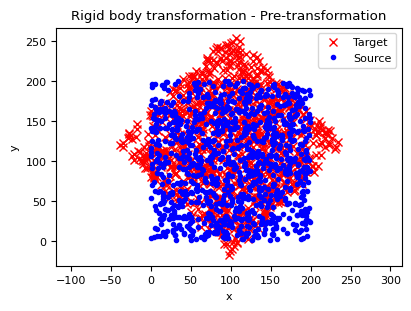

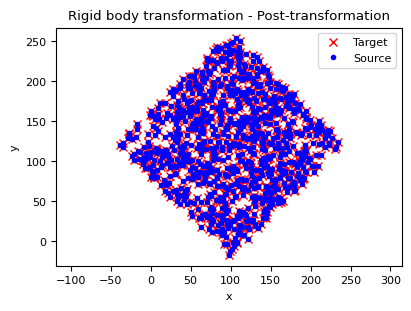

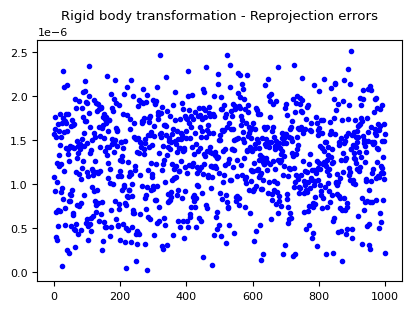

In [4]:
%matplotlib inline


# Find T such that p_target = T * p_source
T = solve_2d_rigid_body_transformation1(p_target, p_source)
p_target_reprojected = apply_2d_homogenous_transformation(T, p_source)

print("T_rigid_body = \n", T)
plot_results(p_source, p_target, p_target_reprojected, "Rigid body transformation")

In [ ]:
from scipy.optimize import minimize


def solve_2d_rigid_body_transformation2(xt, xs):
    def f(p):
        ex = xs[:, 0]*np.cos(p[0]) - xs[:, 1]*np.sin(p[0]) + p[1]-xt[:,0]
        ey = xs[:, 0]*np.sin(p[0]) + xs[:, 1]*np.cos(p[0]) + p[2]-xt[:,1]
        return np.sum(ex**2 + ey**2)

    '''
    def j(p):
        # Hand calculation, using the chain rule
        ex2_p0 = 2*(xs[:, 0]*np.cos(p[0]) - xs[:, 1]*np.sin(p[0]) + p[1]-xt[:,0]) * (-xs[:, 0]*np.sin(p[0]) - xs[:, 1]*np.cos(p[0]))
        ex2_p1 = 2*(xs[:, 0]*np.cos(p[0]) - xs[:, 1]*np.sin(p[0]) + p[1]-xt[:,0])
        ey2_p0 = 2*(xs[:, 0]*np.sin(p[0]) + xs[:, 1]*np.cos(p[0]) + p[2]-xt[:,1]) * (xs[:, 0]*np.cos(p[0]) - xs[:, 1]*np.sin(p[0]))
        ey2_p2 = 2*(xs[:, 0]*np.sin(p[0]) + xs[:, 1]*np.cos(p[0]) + p[2]-xt[:,1])
        return [np.sum(ex2_p0 + ey2_p0), np.sum(ex2_p1), np.sum(ey2_p2)]
    '''

    def j(p):
        # Calculated with Sympy
        j0 = -2*(xs[:, 0]*np.sin(p[0]) + xs[:, 1]*np.cos(p[0]))*(p[1] + xs[:, 0]*np.cos(p[0]) - xt[:,0] - xs[:, 1]*np.sin(p[0])) + 2*(xs[:,0]*np.cos(p[0]) - xs[:, 1]*np.sin(p[0]))*(p[2] + xs[:, 0]*np.sin(p[0]) + xs[:, 1]*np.cos(p[0]) - xt[:,1])
        j1 = 2*p[1] + 2*xs[:, 0]*np.cos(p[0]) - 2*xt[:, 0] - 2*xs[:, 1]*np.sin(p[0])
        j2 = 2*p[2] + 2*xs[:, 0]*np.sin(p[0]) + 2*xs[:, 1]*np.cos(p[0]) - 2*xt[:,1]
        return [np.sum(j0), np.sum(j1), np.sum(j2)]

    def h(p):
        # Calculated with Sympy
        h00 = -2*p[1]*xs[:, 0]*np.cos(p[0]) + 2*p[1]*xs[:, 1]*np.sin(p[0]) - 2*p[2]*xs[:, 0]*np.sin(p[0]) - 2*p[2]*xs[:, 1]*np.cos(p[0]) + 2*xs[:, 0]*xt[:, 0]*np.cos(p[0]) + 2*xs[:, 0]*xt[:, 1]*np.sin(p[0]) - 2*xt[:, 0]*xs[:, 1]*np.sin(p[0]) + 2*xs[:, 1]*xt[:, 1]*np.cos(p[0])
        h01 = -2*xs[:, 0]*np.sin(p[0]) - 2*xs[:, 1]*np.cos(p[0])
        h02 = 2*xs[:, 0]*np.cos(p[0]) - 2*xs[:, 1]*np.sin(p[0])
        h10 = -2*xs[:, 0]*np.sin(p[0]) - 2*xs[:, 1]*np.cos(p[0])
        h11 = 2
        h12 = 0
        h20 = 2*xs[:, 0]*np.cos(p[0]) - 2*xs[:, 1]*np.sin(p[0])
        h21 = 0
        h22 = 2
        return [[np.sum(h00), np.sum(h01), np.sum(h02)], [np.sum(h10), np.sum(h11), np.sum(h12)], [np.sum(h20), np.sum(h21), np.sum(h22)]]

    ic = np.array([0, 0, 0], dtype=np.double)
    res = minimize(f, ic, jac=j, method='BFGS', options={'disp':True})
    p_opt = res.x

    # Build the transformation matrix
    T = np.array(
        [
            [np.cos(p_opt[0]), -np.sin(p_opt[0]), p_opt[1]],
            [np.sin(p_opt[0]),  np.cos(p_opt[0]), p_opt[2]],
            [0, 0, 1],
        ]
    )

    return T

### **Method 2: Nonlinear minimization with BFGS**

Unconstrained minimization with BFGS.  
Objective function: nonlinear, multivarate, scalar.  
Jacobian of the objective function is available.

In [5]:
from scipy.optimize import minimize


def solve_2d_rigid_body_transformation2(xt, xs):
    def f(p):
        ex = xs[:, 0]*np.cos(p[0]) - xs[:, 1]*np.sin(p[0]) + p[1]-xt[:,0]
        ey = xs[:, 0]*np.sin(p[0]) + xs[:, 1]*np.cos(p[0]) + p[2]-xt[:,1]
        return np.sum(ex**2 + ey**2)

    '''
    def j(p):
        # Hand calculation, using the chain rule
        ex2_p0 = 2*(xs[:, 0]*np.cos(p[0]) - xs[:, 1]*np.sin(p[0]) + p[1]-xt[:,0]) * (-xs[:, 0]*np.sin(p[0]) - xs[:, 1]*np.cos(p[0]))
        ex2_p1 = 2*(xs[:, 0]*np.cos(p[0]) - xs[:, 1]*np.sin(p[0]) + p[1]-xt[:,0])
        ey2_p0 = 2*(xs[:, 0]*np.sin(p[0]) + xs[:, 1]*np.cos(p[0]) + p[2]-xt[:,1]) * (xs[:, 0]*np.cos(p[0]) - xs[:, 1]*np.sin(p[0]))
        ey2_p2 = 2*(xs[:, 0]*np.sin(p[0]) + xs[:, 1]*np.cos(p[0]) + p[2]-xt[:,1])
        return [np.sum(ex2_p0 + ey2_p0), np.sum(ex2_p1), np.sum(ey2_p2)]
    '''

    def j(p):
        # Calculated with Sympy
        j0 = -2*(xs[:, 0]*np.sin(p[0]) + xs[:, 1]*np.cos(p[0]))*(p[1] + xs[:, 0]*np.cos(p[0]) - xt[:,0] - xs[:, 1]*np.sin(p[0])) + 2*(xs[:,0]*np.cos(p[0]) - xs[:, 1]*np.sin(p[0]))*(p[2] + xs[:, 0]*np.sin(p[0]) + xs[:, 1]*np.cos(p[0]) - xt[:,1])
        j1 = 2*p[1] + 2*xs[:, 0]*np.cos(p[0]) - 2*xt[:, 0] - 2*xs[:, 1]*np.sin(p[0])
        j2 = 2*p[2] + 2*xs[:, 0]*np.sin(p[0]) + 2*xs[:, 1]*np.cos(p[0]) - 2*xt[:,1]
        return [np.sum(j0), np.sum(j1), np.sum(j2)]

    def h(p):
        # Calculated with Sympy
        h00 = -2*p[1]*xs[:, 0]*np.cos(p[0]) + 2*p[1]*xs[:, 1]*np.sin(p[0]) - 2*p[2]*xs[:, 0]*np.sin(p[0]) - 2*p[2]*xs[:, 1]*np.cos(p[0]) + 2*xs[:, 0]*xt[:, 0]*np.cos(p[0]) + 2*xs[:, 0]*xt[:, 1]*np.sin(p[0]) - 2*xt[:, 0]*xs[:, 1]*np.sin(p[0]) + 2*xs[:, 1]*xt[:, 1]*np.cos(p[0])
        h01 = -2*xs[:, 0]*np.sin(p[0]) - 2*xs[:, 1]*np.cos(p[0])
        h02 = 2*xs[:, 0]*np.cos(p[0]) - 2*xs[:, 1]*np.sin(p[0])
        h10 = -2*xs[:, 0]*np.sin(p[0]) - 2*xs[:, 1]*np.cos(p[0])
        h11 = 2
        h12 = 0
        h20 = 2*xs[:, 0]*np.cos(p[0]) - 2*xs[:, 1]*np.sin(p[0])
        h21 = 0
        h22 = 2
        return [[np.sum(h00), np.sum(h01), np.sum(h02)], [np.sum(h10), np.sum(h11), np.sum(h12)], [np.sum(h20), np.sum(h21), np.sum(h22)]]

    ic = np.array([0, 0, 0], dtype=np.double)
    res = minimize(f, ic, jac=j, method='BFGS', options={'disp':True})
    p_opt = res.x

    # Build the transformation matrix
    T = np.array(
        [
            [np.cos(p_opt[0]), -np.sin(p_opt[0]), p_opt[1]],
            [np.sin(p_opt[0]),  np.cos(p_opt[0]), p_opt[2]],
            [0, 0, 1],
        ]
    )

    return T

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
T_rigid_body = 
 [[  0.70710678  -0.70710678  99.99999996]
 [  0.70710678   0.70710678 -20.00000242]
 [  0.           0.           1.        ]]


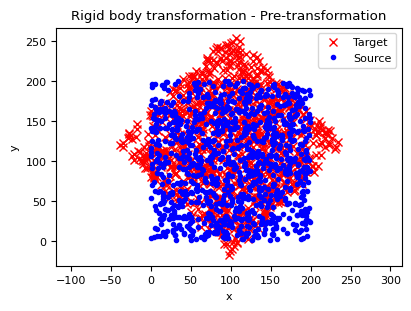

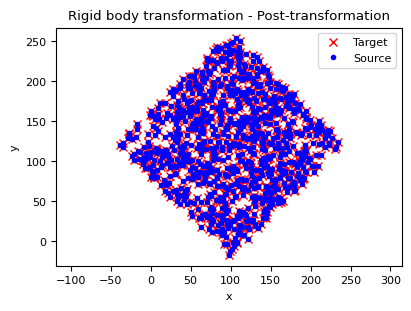

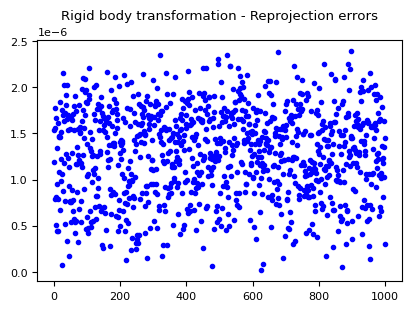

In [6]:
%matplotlib inline

# Find T such that p_target = T * p_source
T = solve_2d_rigid_body_transformation2(p_target, p_source)
p_target_reprojected = apply_2d_homogenous_transformation(T, p_source)

print("T_rigid_body = \n", T)
plot_results(p_source, p_target, p_target_reprojected, "Rigid body transformation")

### **Method 3 : The least-square method**

Most minimization methods only minimize a scalar opbjective function. On another hand, the least-square method can take a vector objective function which then returns a 1D array. However, our problem has 2 dimensions (i.e. the errors in x-axis and in y-axis). Thus, we must concatenate/stack them to make a 1-dimesional array.

Let's say we have $n$-cloud points, which means our objective function must return a 1-dimensional array whose length is $2n$.

Since there are 3 optimization variables: ```p[0]```, ```p[1]```, and ```p[2]```, the dimension of the Jacobian matrix must be $2n \times 3$. First, we write down the Jacobian for errors in x-axis. Next, we write down the Jacobian for errors in y-axis. Finally, we stack them vertically.

Notice that now we have simpler Jacobian than the previous methods. This is because we do not need to square the objective function.

In [7]:
from scipy.optimize import least_squares


def solve_2d_rigid_body_transformation3(xt, xs):
    def f(p):
        ex = xs[:, 0]*np.cos(p[0]) - xs[:, 1]*np.sin(p[0]) + p[1] - xt[:,0]
        ey = xs[:, 0]*np.sin(p[0]) + xs[:, 1]*np.cos(p[0]) + p[2] - xt[:,1]
        return np.hstack([ex, ey])

    def j(p):
        N = len(xs)

        # in x
        a = (-xs[:, 0]*np.sin(p[0]) - xs[:, 1]*np.cos(p[0])).reshape(-1,1)
        b = (1. * np.ones(N)                               ).reshape(-1,1)
        c = (0. * np.ones(N)                               ).reshape(-1,1)

        # in y
        d = (xs[:, 0]*np.cos(p[0]) - xs[:, 1]*np.sin(p[0])).reshape(-1,1)
        e = (0. * np.ones(N)                              ).reshape(-1,1)
        f = (1. * np.ones(N)                              ).reshape(-1,1)

        A = np.hstack((a,b,c))
        B = np.hstack((d,e,f))

        return np.vstack((A, B))


    ic = np.array([0, 0, 0], dtype=np.double)
    res = least_squares(f, ic, jac=j, method='lm')
    print(res)
    p_opt = res.x

    # Build the transformation matrix
    T = np.array(
        [
            [np.cos(p_opt[0]), -np.sin(p_opt[0]), p_opt[1]],
            [np.sin(p_opt[0]),  np.cos(p_opt[0]), p_opt[2]],
            [0, 0, 1],
        ]
    )

    return T

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 3.318e-07  1.177e-06 ... -2.165e-07 -2.681e-07]
           x: [ 7.854e-01  1.000e+02 -2.000e+01]
        cost: 9.426523906567958e-10
         jac: [[-2.294e+02  1.000e+00  0.000e+00]
               [-1.508e+02  1.000e+00  0.000e+00]
               ...
               [-8.181e+01  0.000e+00  1.000e+00]
               [ 1.028e+01  0.000e+00  1.000e+00]]
        grad: [-2.474e-09  1.319e-11 -6.409e-12]
  optimality: 2.4735441238905723e-09
 active_mask: [0 0 0]
        nfev: 5
        njev: 4
T_rigid_body = 
 [[  0.70710678  -0.70710678  99.99999996]
 [  0.70710678   0.70710678 -20.00000242]
 [  0.           0.           1.        ]]


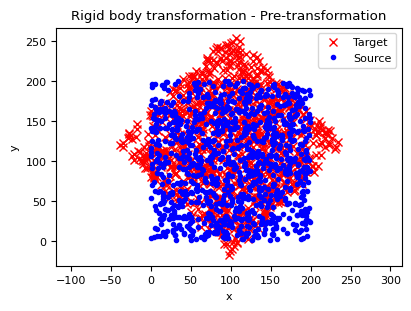

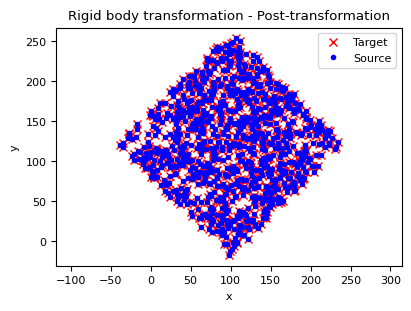

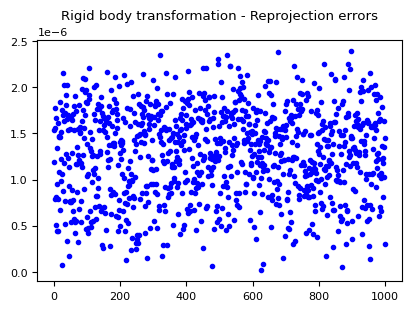

In [8]:
%matplotlib inline

# Find T such that p_target = T * p_source
T = solve_2d_rigid_body_transformation3(p_target, p_source)
p_target_reprojected = apply_2d_homogenous_transformation(T, p_source)

print("T_rigid_body = \n", T)
plot_results(p_source, p_target, p_target_reprojected, "Rigid body transformation")

### Method 4 : The curve-fitting method

For no good reasons, let's use the curve fitting method! 😜

In [9]:
from scipy.optimize import curve_fit


def solve_2d_rigid_body_transformation3(xt, xs):
    N = len(xt)

    def f(x_aug, theta, tx, ty):
        xs = x_aug[0:N]
        ys = x_aug[N:2*N]
        ex = xs*np.cos(theta) - ys*np.sin(theta) + tx
        ey = xs*np.sin(theta) + ys*np.cos(theta) + ty
        return np.hstack([ex, ey])

    def j(x_aug, theta, tx, ty):
        xs = x_aug[0:N]
        ys = x_aug[N:2*N]

        # in x
        a = (-xs*np.sin(theta) - ys*np.cos(theta)).reshape(-1,1)
        b = (1. * np.ones(N)                    ).reshape(-1,1)
        c = (0. * np.ones(N)                    ).reshape(-1,1)

        # in y
        d = (xs*np.cos(theta) - ys*np.sin(theta)).reshape(-1,1)
        e = (0. * np.ones(N)                    ).reshape(-1,1)
        f = (1. * np.ones(N)                    ).reshape(-1,1)

        A = np.hstack((a,b,c))
        B = np.hstack((d,e,f))

        return np.vstack((A, B))


    ic = np.array([0, 0, 0], dtype=np.double)

    # Convert 2D array into 1D array, stack x and y side-by-side
    SOURCE_AUG = np.hstack((xs[:,0], xs[:,1]))
    TARGET_AUG = np.hstack((xt[:,0], xt[:,1]))

    res = curve_fit(f, SOURCE_AUG, TARGET_AUG, method='lm', jac=j, full_output=True)
    print('nfev =',res[2]['nfev'])
    p_opt = res[0]

    # Build the transformation matrix
    T = np.array(
        [
            [np.cos(p_opt[0]), -np.sin(p_opt[0]), p_opt[1]],
            [np.sin(p_opt[0]),  np.cos(p_opt[0]), p_opt[2]],
            [0, 0, 1],
        ]
    )

    return T

nfev = 5
T_rigid_body = 
 [[  0.70710678  -0.70710678  99.99999996]
 [  0.70710678   0.70710678 -20.00000242]
 [  0.           0.           1.        ]]


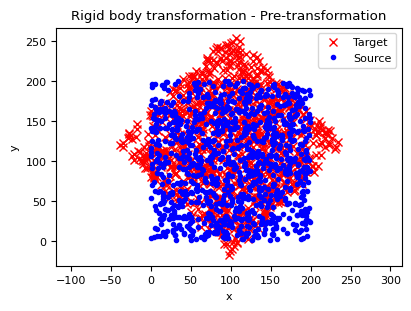

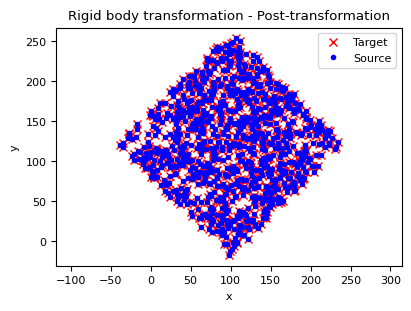

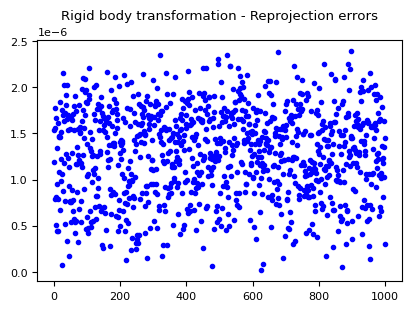

In [10]:
%matplotlib inline

# Find T such that p_target = T * p_source
T = solve_2d_rigid_body_transformation3(p_target, p_source)
p_target_reprojected = apply_2d_homogenous_transformation(T, p_source)

print("T_rigid_body = \n", T)
plot_results(p_source, p_target, p_target_reprojected, "Rigid body transformation")

# Inverse function

### **Method 1: By the root-finding method**

In [ ]:
import numpy as np
from scipy.optimize import root

%matplotlib notebook


def f(x):
    '''
    The function that we want to invert.
    '''
    y = np.sin(x)
    return y

def j(x):
    '''
    The Jacobian of the function that we want to invert.
    This is optional.
    '''
    return np.cos(x)


def finv(y, guess=0.0):
    findx = lambda x: f(x)-y
    res = root(findx, guess, jac=j, method='lm')
    return res.x[0]


y = 0.8
print('y = ', y, ' --> x =', finv(y))
print('x = ', finv(y), ' --> y =', f(finv(y)))

y =  0.8  --> x = 0.9272952180016124
x =  0.9272952180016124  --> y = 0.8000000000000002


### **Method 2: By the least-square method**

Minimizing a sqared function is analogous to root finding.

In [ ]:
import numpy as np
from scipy.optimize import least_squares

%matplotlib notebook


def f(x):
    '''
    The function that we want to invert.
    '''
    y = np.sin(x)
    return y

def j(x):
    '''
    The Jacobian of the function that we want to invert.
    This is optional.
    '''
    return np.cos(x)


def finv(y, guess=0.0):
    findx = lambda x: f(x)-y
    res = least_squares(findx, guess, jac=j)
    return res.x[0]


y = 0.8
print('y = ', y, ' --> x =', finv(y))
print('x = ', finv(y), ' --> y =', f(finv(y)))

y =  0.8  --> x = 0.9272952163764377
x =  0.9272952163764377  --> y = 0.7999999990248953


# **Circle fitting**

Minimizing vector function with the least-square method

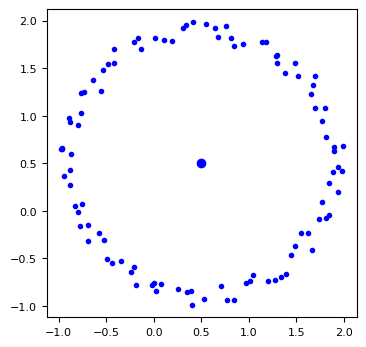

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 8})

%matplotlib inline


def make_circle(center, radius, M=300):
    angle  = (np.exp(1j * 2 * np.pi / M)             ).reshape(-1,1)
    angles = (radius * np.cumprod(np.ones(M) * angle)).reshape(-1,1)
    pts = np.hstack([np.real(angles), np.imag(angles)]) + np.array(center)
    return pts


center = [0.5, 0.5]
radius = 1.4
M = 100
noise = 0.1

circle = make_circle(center, radius, M)

w = (np.random.rand(M, 2)-0.5)* 2.0 * noise
circle = circle + w

fig = plt.figure(figsize=(4, 4));
ax = fig.add_subplot();
ax.plot(circle[:,0], circle[:,1], '.b');
ax.plot(center[0], center[1], 'ob')
ax.axis('equal');

`xtol` termination condition is satisfied.
Function evaluations 6, initial cost 2.0850e+02, final cost 1.3993e+00, first-order optimality 5.44e-14.
estimated center x :  0.4939145609242989
estimated center y :  0.5132478920176287
estimated radius   :  1.4003386530824953


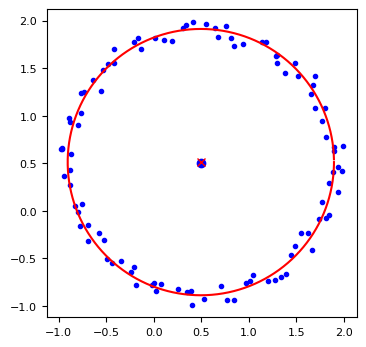

In [12]:
import numpy as np
from scipy.optimize import least_squares

%matplotlib inline

'''
x[0] --> center x
x[1] --> center y
x[2] --> radius
'''

def f(x):
    return (circle[:, 0] - x[0])**2 + (circle[:, 1] - x[1])**2 - x[2]**2

def j(x):
    j0 = -2*(circle[:, 0] - x[0])
    j1 = -2*(circle[:, 1] - x[1])
    j2 = -2*x[2]*np.ones(M)
    return np.vstack([j0, j1, j2]).transpose()

res = least_squares(f, [0.0, 0.0, 1.0], jac=j, method='lm', verbose=1)

print('estimated center x : ', res.x[0])
print('estimated center y : ', res.x[1])
print('estimated radius   : ', res.x[2])

est_cricle = make_circle([res.x[0], res.x[1]], res.x[2])

fig = plt.figure(figsize=(4, 4));
ax = fig.add_subplot();
ax.plot(circle[:,0], circle[:,1], '.b');
ax.plot(center[0], center[1], 'ob') # actual center
ax.plot(est_cricle[:,0], est_cricle[:,1], '-r');
ax.plot(res.x[0], res.x[1], 'xr') # estimated center
ax.axis('equal');